In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load & Read Data

In [25]:
df = pd.read_csv("C:/Users/zumars064124/Documents/ADSB 2/german-credit-risk/german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


## Quick Look

In [26]:
#dimension
df.shape

(1000, 10)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


# Preprocessing Data

## Identify Missing Values

In [28]:
mv = df.isnull().sum()
mv = pd.DataFrame(mv)
mv['Percentage'] = mv[0] / 1723065 *100
mv

#kolom '0' adalah kolom yang berisi banyaknya missing value pada variabel terkait
#kolom 'Percentage' adalah kolom yang berisi persentase missing value pada variabel terkait

,0,Percentage
Unnamed: 0,0,0.000000
Age,0,0.000000
Sex,0,0.000000
Job,0,0.000000
Housing,0,0.000000
Saving accounts,183,0.010621
Checking account,394,0.022866
Credit amount,0,0.000000
Duration,0,0.000000
Purpose,0,0.000000


## Drop data yang tidak diperlukan

In [29]:
#Variabel 'Unnamed: 0' didrop karena tidak diperlukan dalam proses analisis
df.drop(['Unnamed: 0'],axis = 1,inplace = True)

## Imputasi missing value

Imputasi missing value pada data kategorikal menggunakan modus.

In [30]:
mmodus = ['Saving accounts', 'Checking account']
for feature in mmodus:
    if feature in df.columns.values:
        df[feature] = df[feature].fillna(df[feature].value_counts().index[0])

In [31]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

# Exploratory Data Analysis

In [32]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [33]:
kategori = df[['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']]
kategori.describe()

,Sex,Housing,Saving accounts,Checking account,Purpose
count,1000,1000,1000,1000,1000
unique,2,3,4,3,8
top,male,own,little,little,car
freq,690,713,786,668,337


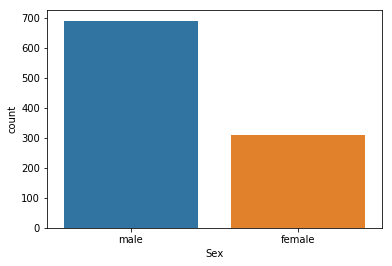

In [36]:
sns.countplot(x = kategori.Sex)
plt.figure(figsize = (20,10))
plt.show()

Berdasarkan visualisasi di atas, customer yang melakukan kredit lebih banyak berjenis kelamin laki-laki dibanding perempuan.

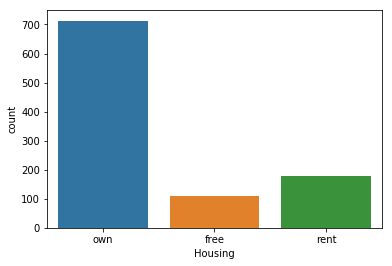

In [61]:
sns.countplot(x = kategori.Housing)
plt.figure(figsize = (20,10))
plt.show()

Customer yang melakukan kredit mayoritas memiliki rumah sendiri dan sebagian kecil customer tidak memiliki rumah atau tinggal dengan menyewa rumah.

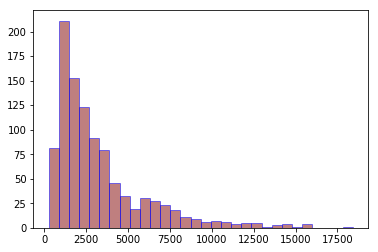

In [39]:
plt.hist(df['Credit amount'], 
         facecolor='maroon', 
         edgecolor='blue', 
         bins=30,
         alpha = 0.5)
plt.show()

Histogram di atas berbentuk skewness positif, di mana banyak customer yang memiliki besar kredit di bawah $5000.

In [42]:
df['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

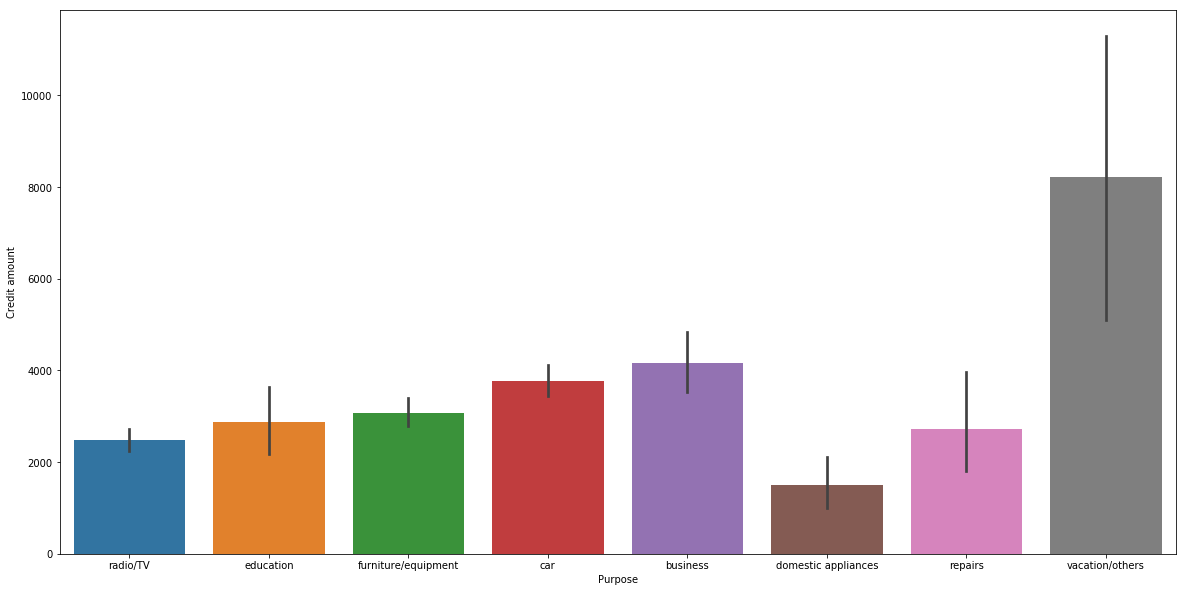

In [59]:
plt.figure(figsize = (20,10))
sns.barplot(x = df['Purpose'], y = df['Credit amount'])
plt.show()

Berdasarkan visualisasi di atas, sebagian besar customer yang melakukan kredit memiliki tujuan untuk melakukan vacation atau hal lainnya.

In [50]:
df.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education


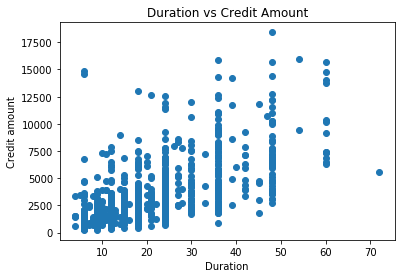

In [64]:
plt.scatter(df['Duration'],df['Credit amount'])
plt.title('Duration vs Credit Amount')
plt.xlabel('Duration')
plt.ylabel('Credit amount')
plt.show()

Berdasarkan data yang dimiliki, customer lebih banyak melakukan kredit dalam durasi di bawah 30 dengan jumlah pinjaman di bawah $5000.

#### Korelasi

In [15]:
from sklearn.preprocessing import LabelEncoder
for feature in kategori:
    if feature in df.columns.values:
        df[feature] = LabelEncoder().fit_transform(df[feature])
        
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1


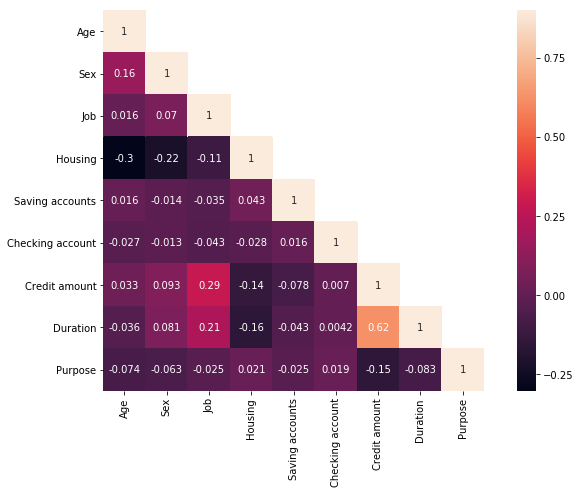

In [20]:
#create correlation
corr = df.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (20,15))
fig.set_size_inches(12, 7)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

Berdasarkan visualisasi di atas, terlihat bahwa terdapat korelasi positif yang cukup tinggi antara duration dengan purpose. Hal ini berarti bahwa semakin lama durasi kredit, semakin besar juga tujuan customer yang melatarbelakangi pengajuan kredit.